# CEB PROJECT

## WINE QUALITY DATASETS

### Introduction

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). We are going just to provide some exploratives analysis of the problem. No missing data. Link: https://archive.ics.uci.edu/dataset/186/wine+quality

### Import data and libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_red = pd.read_csv('C:/Users/fra24/OneDrive/Documenti/uni/magistrale/computing_eb/project/winequality-red.csv', sep=';')
df_white = pd.read_csv('C:/Users/fra24/OneDrive/Documenti/uni/magistrale/computing_eb/project/winequality-white.csv', sep=';')

df_red = pd.DataFrame(df_red)
df_white = pd.DataFrame(df_white)

### Overview of the two separate datasets

#### Red wine

In [3]:
print(df_red.shape)
print(df_red.columns)

(1599, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


#### White wine

In [4]:
print(df_white.shape)
print(df_white.columns)

(4898, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


### Merging of the two dataset

The two datasets share the same columns, making it easy to merge them. Additionally, we add a 'type' column to differentiate between red and white wines.

In [5]:
df_red['type'] = "Red" 
df_white['type'] = "White" 

In [ ]:
df = pd.concat([df_red, df_white], ignore_index=True)

print(df.shape)
print(df.columns)

(6497, 13)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')


We can achieve the same operation using the `.merge()` command.

In [32]:
df = df_red.merge(df_white, how='outer')
print(df.shape)
print(df.columns)

(6497, 13)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')


We create the variables type with the values "Red"/"White" to identify the type of the wines, but we can use Pandas `str` methods to modify this the value as we like. 

Like if we want all lower case:

In [8]:
df['type'].str.lower()

0         red
1         red
2         red
3         red
4         red
        ...  
6492    white
6493    white
6494    white
6495    white
6496    white
Name: type, Length: 6497, dtype: object

Or all UPPERCASE:

In [9]:
df['type'].str.upper()

0         RED
1         RED
2         RED
3         RED
4         RED
        ...  
6492    WHITE
6493    WHITE
6494    WHITE
6495    WHITE
6496    WHITE
Name: type, Length: 6497, dtype: object

It just depends on how we want to visualize the legends and the graphs.

We have the same dataset in the end.

A little overview ho 10 random rows of the dataset

In [10]:
(df.sample(10).round(3))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2891,6.2,0.17,0.30,1.10,0.037,14.0,79.0,0.993,3.50,0.54,10.3,6,White
541,9.5,0.46,0.49,6.30,0.064,5.0,17.0,0.999,3.21,0.73,11.0,6,Red
2057,6.0,0.37,0.32,1.00,0.053,31.0,218.5,0.992,3.29,0.72,9.8,6,White
5112,7.9,0.35,0.28,12.90,0.032,13.0,63.0,0.993,2.99,0.43,13.0,6,White
5479,6.0,0.28,0.24,17.80,0.047,42.0,111.0,0.999,3.10,0.45,8.9,6,White
5997,7.4,0.27,0.26,11.80,0.053,55.0,173.0,0.997,3.11,0.60,9.8,5,White
3805,8.9,0.24,0.33,15.75,0.035,16.0,132.0,0.996,3.00,0.37,12.1,6,White
3898,7.0,0.32,0.31,6.40,0.031,38.0,115.0,0.992,3.38,0.58,12.2,7,White
6389,6.2,0.30,0.42,2.20,0.036,28.0,128.0,0.990,3.13,0.38,11.6,6,White
1418,7.8,0.53,0.01,1.60,0.077,3.0,19.0,0.995,3.16,0.46,9.8,5,Red


### Creating new variables from the original data

By researching online, I found several interesting indicators that can help analyze and better understand wine. These indicators are simply combinations of the variables already present in the dataset.

1) *Total Acidity*: a combination of fixed acidity and volatile acidity can give an overall measure of the wine's acidity.

In [13]:
df['total_acidity'] = df['fixed acidity'] + df['volatile acidity']
df.loc[:5,'total_acidity']

0     8.10
1     8.68
2     8.56
3    11.48
4     8.10
5     8.06
Name: total_acidity, dtype: float64

2) *Sugar Index*: combining residual sugar and alcohol can provide an idea of how residual sugar affects alcohol content.

In [12]:
df['sugar_index'] = df['residual sugar'] / (df['alcohol'] + 1)
df.loc[:5,'sugar_index']

0    0.182692
1    0.240741
2    0.212963
3    0.175926
4    0.182692
5    0.173077
Name: sugar_index, dtype: float64

3. *pH Balance*: pH can be compared with sulphates to obtain a measure of the balance between acidity and preservation.

In [11]:
df['ph_balance'] = df['pH'] / (df['sulphates'] + 1)
df.loc[:5,'ph_balance']

0    2.250000
1    1.904762
2    1.975758
3    2.000000
4    2.250000
5    2.250000
Name: ph_balance, dtype: float64

4. *Aromatic Intensity*: a combination of sulphates and citric acid can give an indication of the potential intensity and complexity of the aromas.

In [14]:
df['aroma_intesity'] = df['citric acid'] * df['sulphates']
df.loc[:5,'aroma_intesity']

0    0.0000
1    0.0000
2    0.0260
3    0.3248
4    0.0000
5    0.0000
Name: aroma_intesity, dtype: float64

In [15]:
(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'ph_balance',
       'sugar_index', 'total_acidity', 'aroma_intesity'],
      dtype='object')

### Checking for missing values

We already know that the dataset does not contain missing values, but we can verify this again using the following code:

In [16]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
ph_balance              0
sugar_index             0
total_acidity           0
aroma_intesity          0
dtype: int64

We have confirmed that there are no missing values in the dataset, but we can try to add a line of NA values to check how to manage missing values.

In [17]:
df = pd.concat([df, pd.DataFrame([np.nan] * len(df.columns), index=df.columns).T], ignore_index=True)

print("NaN values:")
print(df.isna().sum())

NaN values:
fixed acidity           1
volatile acidity        1
citric acid             1
residual sugar          1
chlorides               1
free sulfur dioxide     1
total sulfur dioxide    1
density                 1
pH                      1
sulphates               1
alcohol                 1
quality                 1
type                    1
ph_balance              1
sugar_index             1
total_acidity           1
aroma_intesity          1
dtype: int64


In [18]:
df = df.dropna()

print("NaN value after dropna():")
print(df.isna().sum())

NaN value after dropna():
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
ph_balance              0
sugar_index             0
total_acidity           0
aroma_intesity          0
dtype: int64


### Overview

In [19]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ph_balance,sugar_index,total_acidity,aroma_intesity
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,2.117519,0.494635,7.554973,0.170495
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.190836,0.460423,1.342139,0.103420
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.913333,0.051724,4.110000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,2.006494,0.155172,6.710000,0.109200
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,2.127168,0.257426,7.300000,0.151800
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,2.246753,0.740891,8.050000,0.211200
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,2.703125,5.181102,16.285000,2.000000


These are the general statistics of the variables. It could be interesting to study the differences in some of the variables based on the type of wine.

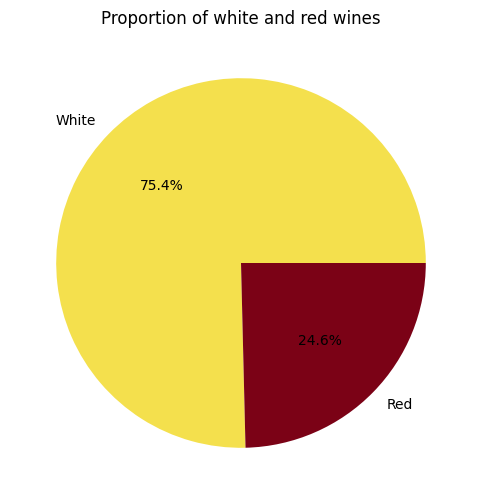

In [20]:
wine_counts = df["type"].value_counts()
colors = ['#F4E04D', '#7B0216']  # white, red

plt.figure(figsize=(6, 6))
plt.pie(wine_counts, labels=wine_counts.index, autopct='%1.1f%%', colors=colors)
plt.title("Proportion of white and red wines")
plt.show()

In [22]:
for (method, group) in df.groupby('type'):
    print(f"====> {method:30s} shape={group.shape}")

====> Red                            shape=(1599, 17)
====> White                          shape=(4898, 17)


The proportions of white and red wines are not balanced.

We can see also the mean values of each variables for the wines divided by their type (Red/White)

In [23]:
df.groupby('type').mean().round(3).T

type,Red,White
fixed acidity,8.320,6.855
volatile acidity,0.528,0.278
citric acid,0.271,0.334
residual sugar,2.539,6.391
chlorides,0.087,0.046
free sulfur dioxide,15.875,35.308
total sulfur dioxide,46.468,138.361
density,0.997,0.994
pH,3.311,3.188
sulphates,0.658,0.490


It can be observed that there are differences in the mean between the two types of wine, especially for the variables **volatile acidity, residual sugar, chlorides, sulfur dioxide and sugar index**.

We want to examine if there are differences in the variables *alcohol, sugar index, pH, sulphates, total acidity, and aroma intensity* based on the type of wine.

In [24]:
variables = ["alcohol", "sugar_index", "pH", "sulphates", "total_acidity", "aroma_intesity"] # interesting variables

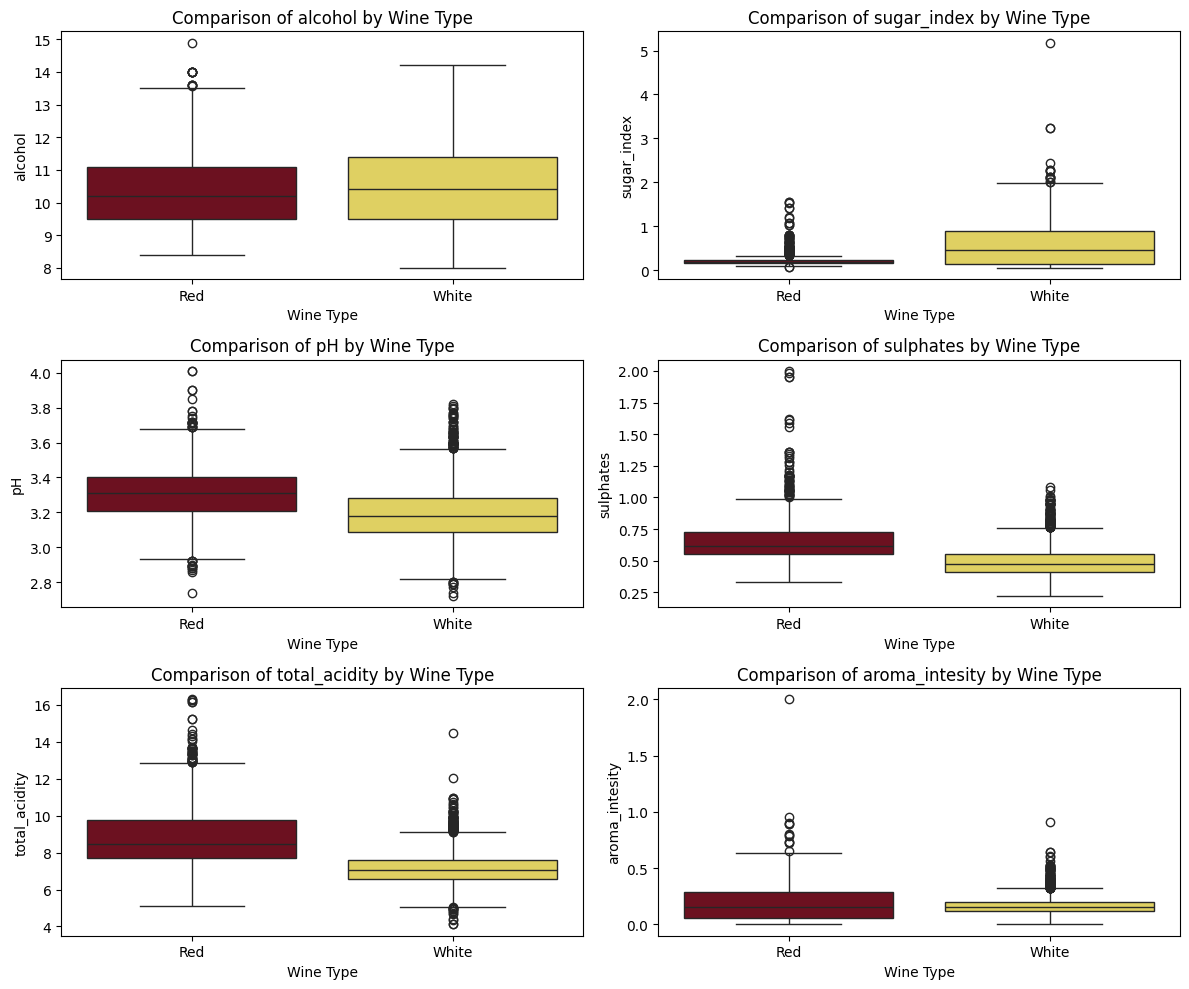

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # Crea una griglia 2x2
axes = axes.flatten()  # Rende la griglia un array monodimensionale per iterare facilmente

for i, var in enumerate(variables[:6]):  # Assumiamo di voler mostrare solo i primi 4
    sns.boxplot(
        x="type", 
        y=var, 
        data=df, 
        hue="type", 
        palette={"Red": "#7B0216", "White": "#F4E04D"}, 
        legend=False, 
        ax=axes[i]  # Disegna nel subplot corrispondente
    )
    axes[i].set_title(f"Comparison of {var} by Wine Type")
    axes[i].set_xlabel("Wine Type")
    axes[i].set_ylabel(var)

plt.tight_layout()  # Migliora la disposizione dei grafici
plt.show()


Using boxplots, we can observe and comment on some differences between the red and white wines in the dataset. White wines appear to be generally more alcoholic than red wines. Regarding the sugar index, white wines show much higher values for this parameter, while red wines present many outliers. The pH variable, on the other hand, tends to have higher average values for red wines, with numerous outliers present for both types of wine. A similar situation is observed for sulfate levels, where red wines generally have higher concentrations of sulfites. Finally, total acidity values are much higher in red wines. There seem to be correlations or similar patterns in the variables based on the type of wine.

These are the "scientific parameters" that describe a wine. We can also analyze the difference in the mark/grade that the wines receive, conditioned by the type.

In [28]:
quality_counts = df.groupby(["quality", "type"]).size().unstack()
quality_counts['Red'] = quality_counts['Red']/len(df_red) # proportion of red wines by quality
quality_counts['White'] = quality_counts['White']/len(df_white) # proportion of white wines by quality

quality_counts.round(3)

type,Red,White
quality,,
3.0,0.006,0.004
4.0,0.033,0.033
5.0,0.426,0.297
6.0,0.399,0.449
7.0,0.124,0.180
8.0,0.011,0.036
9.0,NaN,0.001


We can try to use a graphic visualitation to see better the quality distribution of the two types of wines

<Figure size 1000x600 with 0 Axes>

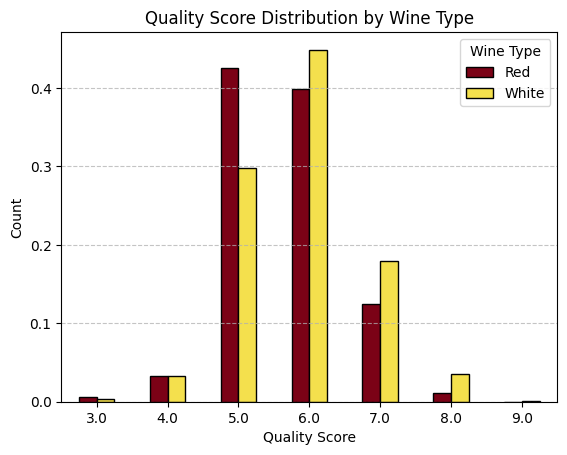

In [29]:
plt.figure(figsize=(10, 6))
quality_counts.plot(kind="bar", color={"Red": "#7B0216", "White": "#F4E04D"}, edgecolor="black")

plt.title("Quality Score Distribution by Wine Type")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.legend(title="Wine Type")

plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.75)
plt.show()

The graph shows how there are differences between the quality scores assigned to red and white wines in general. A slightly mirrored pattern can be observed, with more red wines being slightly below average compared to red wines that are considered acceptable, and the opposite for white wines. Additionally, it is clear that for quality values greater than or equal to 7, the percentage of white wines is much higher than that of red wines. It seems easier to find white wines with decent scores compared to red wines.

### Five interesting topics we can study with this type of data

Below, the best/worst wines or those with particular characteristics present in the dataset will be shown. Unfortunately, the dataset does not contain the names of the wines, which would have been interesting to have in order to select the best wine based on individual preferences and needs. For convenience, in some cases, threshold values of 1% or 5% will be arbitrarily selected to observe wines with specific characteristics.

Additionally, for ease of visualization, only some of the columns from the dataset are displayed based on the situation, and no graphs are produced because at this stage, the focus is solely on identifying which wines meet certain characteristics.

The general characteristics of each selected wine are provided.

#### 1) Best wines per type and their statistics

In [76]:
df_best = df.loc[(df['quality'] >= 8) , var_selection1].round(3)

In [91]:
df_best.groupby("type").max().T

type,Red,White
density,0.999,1.001
pH,3.720,3.590
sulphates,1.100,0.950
alcohol,14.000,14.000
total_acidity,12.910,9.370
sugar_index,0.471,1.439
aroma_intesity,0.590,0.380


In [79]:
df_best[df_best['type'] == 'Red'].sort_values(by='pH', ascending=False)

,type,density,pH,sulphates,alcohol,total_acidity,sugar_index,aroma_intesity
588,Red,0.992,3.72,0.74,14.0,5.42,0.133,0.178
390,Red,0.992,3.56,0.82,12.9,6.45,0.101,0.041
1269,Red,0.991,3.50,0.82,14.0,5.99,0.120,0.025
828,Red,0.994,3.46,0.74,12.7,8.37,0.168,0.067
1202,Red,0.995,3.35,0.69,11.7,9.02,0.142,0.269
267,Red,0.997,3.35,0.86,12.8,8.25,0.261,0.396
1549,Red,0.994,3.24,0.70,11.4,7.76,0.145,0.210
278,Red,0.998,3.23,0.82,12.6,10.62,0.471,0.369
1403,Red,0.996,3.23,1.10,10.0,7.53,0.155,0.363
1449,Red,0.995,3.23,0.76,11.3,7.58,0.163,0.236


,density,pH,sulphates,alcohol,total_acidity,sugar_index,aroma_intesity
type,,,,,,,
Red,18,18,18,18,18,18,18
White,180,180,180,180,180,180,180


In [75]:
var_selection1 =["type", "density", "pH", "sulphates", "alcohol", "total_acidity", "sugar_index", "aroma_intesity"] #selected variables, for better visualization

**Red wines:**

In [72]:
df.loc[(df['quality'] >= 8) & (df['type'] == "Red"), var_selection1].round(3)

,density,pH,sulphates,alcohol,total_acidity,sugar_index,aroma_intesity
55,0.992,3.72,0.74,14.0,5.42,0.133,0.178
218,0.991,3.50,0.82,14.0,5.99,0.120,0.025
303,0.992,3.56,0.82,12.9,6.45,0.101,0.041
3892,0.996,3.23,1.10,10.0,7.53,0.155,0.363
3921,0.995,3.23,0.76,11.3,7.58,0.163,0.236
4402,0.994,3.24,0.70,11.4,7.76,0.145,0.210
5098,0.994,3.46,0.74,12.7,8.37,0.168,0.067
5201,0.997,3.35,0.86,12.8,8.25,0.261,0.396
5223,0.992,3.20,0.72,13.1,8.44,0.177,0.245
5777,0.995,3.35,0.69,11.7,9.02,0.142,0.269


General description:

In [73]:
df.loc[(df['quality'] >= 8) & (df['type'] == "Red"), var_selection1].describe().round(3)

,density,pH,sulphates,alcohol,total_acidity,sugar_index,aroma_intesity
count,18.000,18.000,18.000,18.000,18.000,18.000,18.000
mean,0.995,3.267,0.768,12.094,8.990,0.196,0.297
std,0.002,0.201,0.115,1.224,2.066,0.092,0.155
min,0.991,2.880,0.630,9.800,5.420,0.101,0.025
25%,0.994,3.162,0.690,11.325,7.625,0.143,0.216
50%,0.995,3.230,0.740,12.150,8.730,0.165,0.342
75%,0.997,3.350,0.820,12.875,10.530,0.217,0.368
max,0.999,3.720,1.100,14.000,12.910,0.471,0.590


**White wines:**

In [74]:
df.loc[(df['quality'] >= 8) & (df['type'] == "White"), var_selection1].round(3)

,density,pH,sulphates,alcohol,total_acidity,sugar_index,aroma_intesity
1,0.989,3.57,0.36,12.8,4.125,0.304,0.144
4,0.989,3.46,0.36,12.8,4.720,0.312,0.140
26,0.987,3.33,0.59,14.0,5.230,0.080,0.183
43,0.990,3.27,0.34,12.9,5.290,0.410,0.184
58,0.992,3.53,0.51,12.5,5.550,0.615,0.071
...,...,...,...,...,...,...,...
5391,0.993,3.22,0.63,10.4,8.370,0.149,0.220
5459,0.994,3.01,0.38,10.5,8.420,0.591,0.137
5505,0.991,3.04,0.32,11.7,8.570,0.079,0.115
5506,0.991,3.04,0.32,11.7,8.570,0.079,0.115


General description:

In [75]:
df.loc[(df['quality'] >= 8) & (df['type'] == "White"), var_selection1].describe().round(3)

,density,pH,sulphates,alcohol,total_acidity,sugar_index,aroma_intesity
count,180.000,180.000,180.000,180.000,180.000,180.000,180.000
mean,0.992,3.221,0.486,11.651,6.956,0.471,0.159
std,0.003,0.151,0.146,1.274,0.824,0.406,0.063
min,0.987,2.940,0.250,8.500,4.125,0.061,0.013
25%,0.990,3.128,0.380,11.000,6.533,0.155,0.114
50%,0.992,3.230,0.460,12.000,7.045,0.313,0.145
75%,0.993,3.330,0.582,12.600,7.490,0.628,0.186
max,1.001,3.590,0.950,14.000,9.370,1.439,0.380


We can see that there is a higher number of white wines with high ratings compared to red wines, and the original dataset proportion is not maintained.

#### 2) Whines without sulphates

It might be interesting to look for wines with low sulfite content, as many people dislike wines with these elements, and some individuals are even allergic to them.

In [57]:
soglia = df['sulphates'].quantile(0.01)
print(f"The 1% of the wines have a level of sulphates lower than {soglia}")

The 1% of the wines have a level of sulphates lower than 0.3


In [58]:
var_selection2 =["type", "sulphates", "quality", "density", "total_acidity", "sugar_index", "aroma_intesity"] #selected variables, for better visualization

In [59]:
df.loc[(df['sulphates'] < soglia), var_selection2].round(3)

,type,sulphates,quality,density,total_acidity,sugar_index,aroma_intesity
20,White,0.28,7.0,0.993,5.060,0.848,0.064
176,White,0.27,8.0,0.989,5.850,0.444,0.073
309,White,0.27,6.0,0.991,5.850,0.303,0.076
310,White,0.27,6.0,0.991,5.850,0.303,0.076
431,White,0.29,7.0,0.987,6.040,0.094,0.081
881,White,0.26,7.0,0.992,6.340,0.677,0.083
957,White,0.27,7.0,0.990,6.460,0.582,0.070
1051,White,0.28,5.0,0.992,6.430,0.103,0.064
1174,White,0.26,8.0,0.989,6.570,0.424,0.062
1175,White,0.26,8.0,0.989,6.570,0.424,0.062


In [60]:
df.loc[(df['sulphates'] < soglia), var_selection2].describe().round(3)

,sulphates,quality,density,total_acidity,sugar_index,aroma_intesity
count,52.000,52.000,52.000,52.000,52.000,52.000
mean,0.275,5.981,0.992,7.441,0.471,0.087
std,0.016,1.111,0.002,1.093,0.319,0.035
min,0.220,3.000,0.987,5.060,0.079,0.017
25%,0.270,5.000,0.990,6.798,0.126,0.069
50%,0.280,6.000,0.992,7.325,0.433,0.081
75%,0.290,7.000,0.993,8.018,0.626,0.108
max,0.290,8.000,0.998,10.470,1.117,0.160


We can see that among the wines with low sulfites, there are only white wines.

#### 3) Most and less dense wines

In Portugal, I noticed the trend of drinking denser wines and liquors, such as Port wine, compared to Italy. I was curious to see which wines are the most and least dense.

In [31]:
soglia1 = df['density'].quantile(0.01)
soglia2 = df['density'].quantile(0.99)

print(f"The 1% of the wines have a density lower than {soglia1}")
print(f"The 1% of the wines have a density higher than {soglia2}")

The 1% of the wines have a density lower than 0.98892
The 1% of the wines have a density higher than 1.0006


In [32]:
var_selection3 =["type", "quality", "total_acidity", "sugar_index", "aroma_intesity", "ph_balance"] #selected variables, for better visualization

**Less dense wines:**

In [33]:
df.loc[(df['density'] < soglia1), var_selection3].round(3)

,type,quality,total_acidity,sugar_index,aroma_intesity,ph_balance
2464,White,6.0,6.370,0.163,0.099,2.400
3202,White,7.0,6.010,0.131,0.120,2.213
3418,White,6.0,7.130,0.086,0.115,2.262
4466,White,7.0,7.180,0.102,0.170,2.059
4469,White,7.0,7.180,0.102,0.170,2.059
...,...,...,...,...,...,...
6356,White,7.0,6.380,0.240,0.122,2.163
6388,White,6.0,6.120,0.117,0.129,2.266
6464,White,6.0,6.555,0.137,0.161,2.096
6466,White,6.0,5.900,0.100,0.129,2.370


**Most dense wines:**

In [ ]:
df.loc[(df['density'] > soglia2), var_selection3].round(3)

,type,quality,total_acidity,sugar_index,aroma_intesity,ph_balance
364,Red,7.0,13.415,0.527,0.482,1.775
366,Red,7.0,13.415,0.527,0.482,1.775
442,Red,7.0,16.285,0.303,0.517,1.756
538,Red,7.0,13.250,0.446,0.323,1.928


In [53]:
df_very_dense = df.loc[(df['density'] > soglia2), var_selection3].round(3)

In [54]:
df_very_dense

,type,quality,total_acidity,sugar_index,aroma_intesity,ph_balance
289,Red,5.0,12.020,0.324,0.503,1.641
294,Red,6.0,13.640,0.305,0.421,1.685
324,Red,6.0,10.490,1.078,0.138,1.870
325,Red,6.0,10.490,1.078,0.138,1.870
338,Red,6.0,12.890,0.240,0.580,1.580
353,Red,5.0,14.030,0.343,0.608,1.797
359,Red,6.0,12.980,0.241,0.449,1.887
364,Red,7.0,13.415,0.527,0.482,1.775
366,Red,7.0,13.415,0.527,0.482,1.775
374,Red,6.0,14.410,0.322,0.510,1.663


In [ ]:
df_very_dense.sort_values

Signature:
df_very_dense.sort_values(
    by: 'IndexLabel',
    *,
    axis: 'Axis' = 0,
    ascending: 'bool | list[bool] | tuple[bool, ...]' = True,
    inplace: 'bool' = False,
    kind: 'SortKind' = 'quicksort',
    na_position: 'str' = 'last',
    ignore_index: 'bool' = False,
    key: 'ValueKeyFunc | None' = None,
) -> 'DataFrame | None'
Docstring:
Sort by the values along either axis.

Parameters
----------
by : str or list of str
    Name or list of names to sort by.

    - if `axis` is 0 or `'index'` then `by` may contain index
      levels and/or column labels.
    - if `axis` is 1 or `'columns'` then `by` may contain column
      levels and/or index labels.
axis : "{0 or 'index', 1 or 'columns'}", default 0
     Axis to be sorted.
ascending : bool or list of bool, default True
     Sort ascending vs. descending. Specify list for multiple sort
     orders.  If this is a list of bools, must match the length of
     the by.
inplace : bool, default False
     If True, perform op

In [87]:
df_very_dense.pivot_table(index='quality', columns='type', values='total_acidity', aggfunc='max').round(3)

type,Red,White
quality,,
3.0,12.180,NaN
4.0,11.035,NaN
5.0,16.245,9.63
6.0,14.610,9.54
7.0,16.285,NaN


In [69]:
df_very_dense.sort_values(by='quality', ascending=False)

,type,quality,total_acidity,sugar_index,aroma_intesity,ph_balance
364,Red,7.0,13.415,0.527,0.482,1.775
366,Red,7.0,13.415,0.527,0.482,1.775
538,Red,7.0,13.250,0.446,0.323,1.928
442,Red,7.0,16.285,0.303,0.517,1.756
359,Red,6.0,12.980,0.241,0.449,1.887
294,Red,6.0,13.640,0.305,0.421,1.685
374,Red,6.0,14.410,0.322,0.510,1.663
338,Red,6.0,12.890,0.240,0.580,1.580
324,Red,6.0,10.490,1.078,0.138,1.870
325,Red,6.0,10.490,1.078,0.138,1.870


In [36]:
df_very_dense[df_very_dense['quality'] >= 7]

,type,quality,total_acidity,sugar_index,aroma_intesity,ph_balance
364,Red,7.0,13.415,0.527,0.482,1.775
366,Red,7.0,13.415,0.527,0.482,1.775
442,Red,7.0,16.285,0.303,0.517,1.756
538,Red,7.0,13.250,0.446,0.323,1.928


#### 4) Most alcoholic wines per type with a decent quality

In this case, I was interested in finding the most alcoholic wines that also have very high scores, to see if there are any very strong wines that still receive high ratings.

In [58]:
soglia_alcohol = df['alcohol'].quantile(0.99)
print(f"The 99% of the wines have an alcohol content lower than {soglia_alcohol}")

The 99% of the wines have an alcohol content lower than 13.4


In [59]:
var_selection4 =["type", "quality","total_acidity", "aroma_intesity", "ph_balance"] #selected variables, for better visualization

In [60]:
df_alcol = df.loc[((df['alcohol'] > soglia_alcohol) & (df["quality"] >= 7)), var_selection4].round(3)

In [65]:
df_alcol.sort_values(by="quality", ascending=False)

,type,quality,total_acidity,aroma_intesity,ph_balance
588,Red,8.0,5.420,0.178,2.138
1269,Red,8.0,5.990,0.025,1.923
4544,White,8.0,5.230,0.183,2.094
1132,Red,7.0,7.760,0.299,1.798
821,Red,7.0,5.320,0.000,2.132
1228,Red,7.0,5.520,0.000,2.127
1475,Red,7.0,5.770,0.097,1.883
2300,White,7.0,6.240,0.172,1.916
1477,Red,7.0,5.770,0.097,1.883
2837,White,7.0,7.540,0.159,2.147


There are almost 40 wines with good quality and very high alcohol levels, most of which are white wines.

#### 5) Let's study whether there is a difference in aroma intensity between the two types of wine based on variables such as density, sulfites, and total acidity.

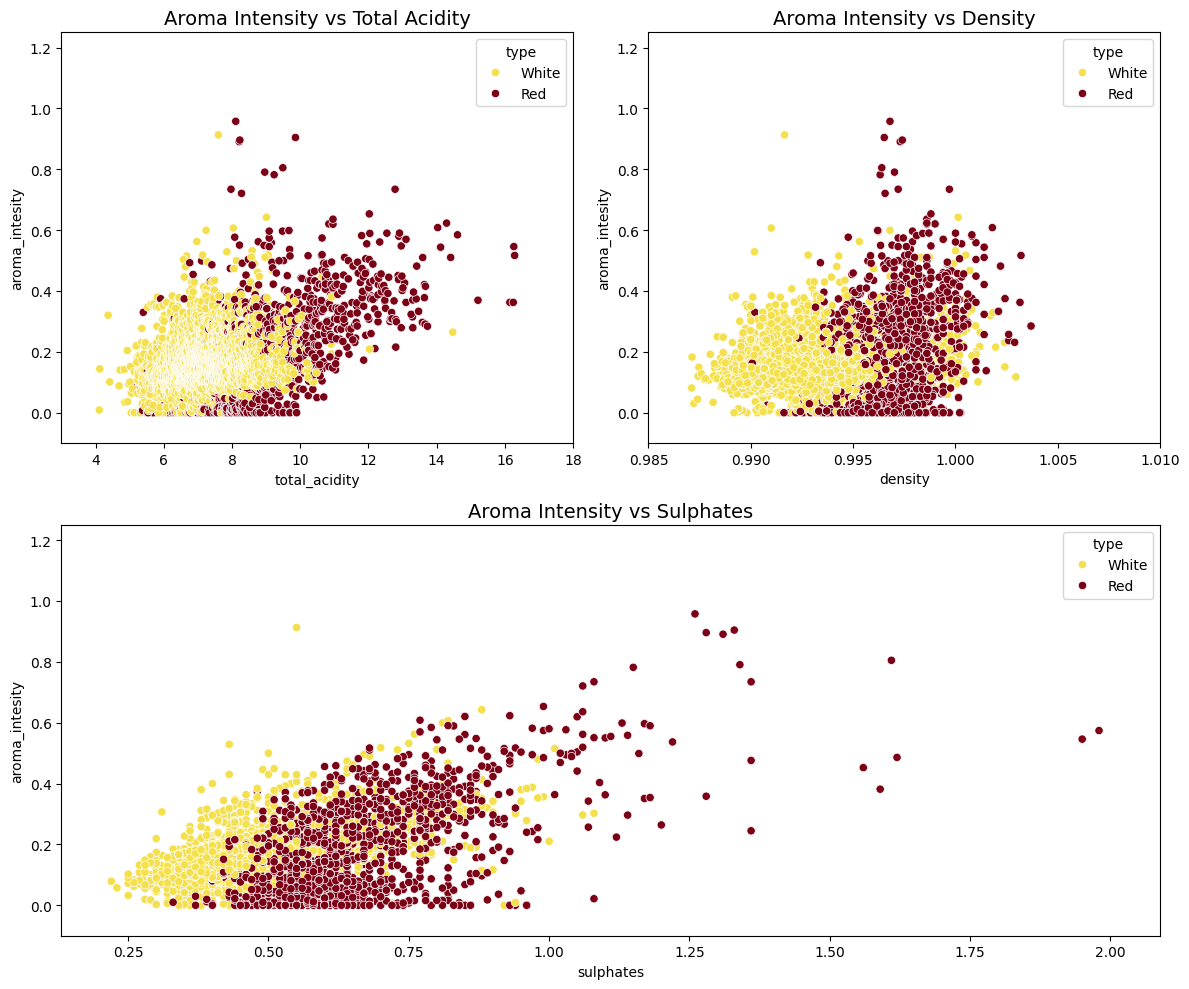

In [68]:
fig = plt.figure(figsize=(12, 10))

ax1 = plt.subplot2grid((2, 2), (0, 0))
sns.scatterplot(x="total_acidity", y="aroma_intesity", data=df, hue='type', palette=['#F4E04D', '#7B0216'], ax=ax1)
ax1.set_title("Aroma Intensity vs Total Acidity", fontsize=14)
ax1.set_xlim(3, 18)
ax1.set_ylim(-0.1, 1.25)

ax2 = plt.subplot2grid((2, 2), (0, 1))
sns.scatterplot(x="density", y="aroma_intesity", data=df, hue='type', palette=['#F4E04D', '#7B0216'], ax=ax2)
ax2.set_title("Aroma Intensity vs Density", fontsize=14)
ax2.set_xlim(0.985, 1.01)
ax2.set_ylim(-0.1, 1.25)

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
sns.scatterplot(x="sulphates", y="aroma_intesity", data=df, hue='type', palette=['#F4E04D', '#7B0216'], ax=ax3)
ax3.set_title("Aroma Intensity vs Sulphates", fontsize=14)
ax3.set_ylim(-0.1, 1.25)

plt.tight_layout()
plt.show()

There seems to be a good level of separation between red and white wines (not in every situation), not so much in terms of aroma intensity, but rather based on the previously selected variables.

## Bibliography

- the data: https://archive.ics.uci.edu/dataset/186/wine+quality
- for the data visualization: https://python-graph-gallery.com/ and https://www.data-to-viz.com/
- for the python function didn't see during classes (for example `.quantile()` ): https://www.w3schools.com/
- for more details: http://www.vinhoverde.pt/en/